In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv("mutationc.csv")

In [11]:
ranked_mutations = data.iloc[:,1:].sum().sort_values(ascending=False).keys()
t_actual = data.iloc[:,0].str.replace(r'^C\d+$','1',regex=True).replace(r'^NC\d+$','0',regex=True).astype(int)
actual = pd.DataFrame(
    np.tile(t_actual.values.reshape(t_actual.shape[0],1), len(ranked_mutations)),
    columns=ranked_mutations,
    index=t_actual.index
)
predicted = data[ranked_mutations]

TP = (((actual == 1) & (predicted == 1))).sum()
FP = (((actual == 0) & (predicted == 1))).sum()
FN = (((actual == 1) & (predicted == 0))).sum()
TN = (((actual == 0) & (predicted == 0))).sum()

values = pd.DataFrame({
    'Mutation':ranked_mutations,
    'TP': TP,
    'FP': FP,
    'FN': FN,
    'TN': TN,
    'TP-FP':TP-FP
})
F = values.sort_values(by='TP-FP',ascending=False).head(1)

group_A = data[(data[F.index[0]] == 1)]
group_B = data[(data[F.index[0]] == 0)]

## Confusion Matracies

In [12]:
ranked_mutations = group_A.iloc[:,1:].sum().sort_values(ascending=False).keys()
t_actual = group_A.iloc[:,0].str.replace(r'^C\d+$','1',regex=True).replace(r'^NC\d+$','0',regex=True).astype(int)
actual = pd.DataFrame(
    np.tile(t_actual.values.reshape(-1,1), len(ranked_mutations)),
    columns=ranked_mutations,
    index=t_actual.index
)
predicted = group_A[ranked_mutations]

TP = (((actual == 1) & (predicted == 1))).sum()
FP = (((actual == 0) & (predicted == 1))).sum()
FN = (((actual == 1) & (predicted == 0))).sum()
TN = (((actual == 0) & (predicted == 0))).sum()

values = pd.DataFrame({
    'Mutation':ranked_mutations,
    'TP': TP,
    'FP': FP,
    'FN': FN,
    'TN': TN,
    'TP-FP':TP-FP
})
alpha = values.sort_values(by='TP-FP',ascending=False).head(2).index[1] # second most TP-FP val
group_A_1 = group_A[group_A[alpha] == 1]
group_A_0 = group_A[group_A[alpha] == 0]
top10features = pd.DataFrame({"Group A":values.sort_values(by='TP-FP',ascending=False).head(10).index})

/var/folders/jl/mzy8kkps00x4490d9wzclp1r0000gn/T/ipykernel_61442/1846368004.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confusion_matrix["PP"] = alpha_val.TP[0], alpha_val.FP[0]
/var/folders/jl/mzy8kkps00x4490d9wzclp1r0000gn/T/ipykernel_61442/1846368004.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confusion_matrix["PN"] = alpha_val.FN[0], alpha_val.TN[0]


Text(50.72222222222221, 0.5, 'ACTUAL')

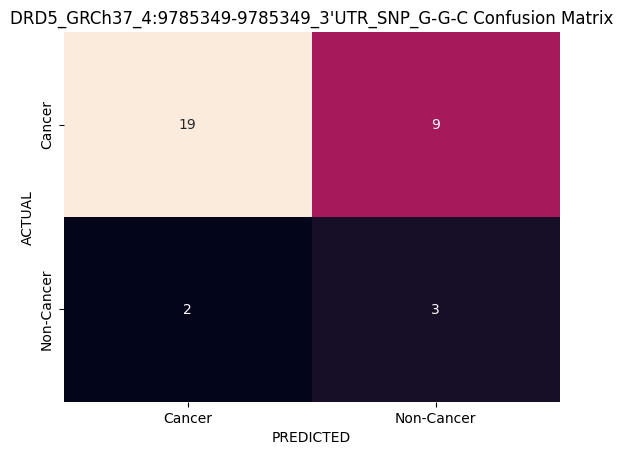

In [13]:
## Confusion Matrix
alpha_val = values[values["Mutation"] == alpha]
confusion_matrix = pd.DataFrame(columns=["PP","PN"])
confusion_matrix["PP"] = alpha_val.TP[0], alpha_val.FP[0]
confusion_matrix["PN"] = alpha_val.FN[0], alpha_val.TN[0]
confusion_matrix

plt.title(f"{alpha} Confusion Matrix")
sns.heatmap(confusion_matrix, annot=True, cbar=False, xticklabels=['Cancer','Non-Cancer'] ,yticklabels=['Cancer','Non-Cancer'], fmt='g')
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")

In [14]:
ranked_mutations = group_B.iloc[:,1:].sum().sort_values(ascending=False).keys()
t_actual = group_B.iloc[:,0].str.replace(r'^C\d+$','1',regex=True).replace(r'^NC\d+$','0',regex=True).astype(int)
actual = pd.DataFrame(
    np.tile(t_actual.values.reshape(-1,1), len(ranked_mutations)),
    columns=ranked_mutations,
    index=t_actual.index
)
predicted = group_B[ranked_mutations]

TP = (((actual == 1) & (predicted == 1))).sum()
FP = (((actual == 0) & (predicted == 1))).sum()
FN = (((actual == 1) & (predicted == 0))).sum()
TN = (((actual == 0) & (predicted == 0))).sum()

values = pd.DataFrame({
    'Mutation':ranked_mutations,
    'TP': TP,
    'FP': FP,
    'FN': FN,
    'TN': TN,
    'TP-FP':TP-FP
})

beta = values.sort_values(by='TP-FP',ascending=False).head(1).index[0]
group_B_1 = group_B[group_B[beta] == 1]
group_B_0 = group_B[group_B[beta] == 0]
top10features["Group B"] = values.sort_values(by='TP-FP',ascending=False).head(10).index
values.sort_values(by='TP-FP',ascending=False).head(10)

,Mutation,TP,FP,FN,TN,TP-FP
KRAS_GRCh37_12:25398284-25398284_Missense-Mutation_SNP_C-C-A_C-C-T_C-C-G,KRAS_GRCh37_12:25398284-25398284_Missense-Muta...,25,17,51,75,8
KRAS_GRCh37_12:25398281-25398281_Missense-Mutation_SNP_C-C-T,KRAS_GRCh37_12:25398281-25398281_Missense-Muta...,11,4,65,88,7
APC_GRCh37_5:112175951-112175952_Frame-Shift-Ins_INS_----A,APC_GRCh37_5:112175951-112175952_Frame-Shift-I...,5,0,71,92,5
APC_GRCh37_5:112116592-112116592_Nonsense-Mutation_SNP_C-C-T,APC_GRCh37_5:112116592-112116592_Nonsense-Muta...,5,1,71,91,4
APC_GRCh37_5:112175639-112175639_Nonsense-Mutation_SNP_C-C-T,APC_GRCh37_5:112175639-112175639_Nonsense-Muta...,7,3,69,89,4
QKI_GRCh37_6:163987695-163987695_Intron_DEL_T-T--,QKI_GRCh37_6:163987695-163987695_Intron_DEL_T-T--,4,0,72,92,4
PIK3CA_GRCh37_3:178936082-178936082_Missense-Mutation_SNP_G-G-A,PIK3CA_GRCh37_3:178936082-178936082_Missense-M...,5,1,71,91,4
HCRTR2_GRCh37_6:55145214-55145214_Silent_SNP_G-G-A,HCRTR2_GRCh37_6:55145214-55145214_Silent_SNP_G...,3,0,73,92,3
DIS3_GRCh37_13:73337650-73337650_Missense-Mutation_SNP_C-C-T,DIS3_GRCh37_13:73337650-73337650_Missense-Muta...,3,0,73,92,3
UBE2D1_GRCh37_10:60128572-60128572_3'UTR_DEL_T-T--,UBE2D1_GRCh37_10:60128572-60128572_3'UTR_DEL_T...,3,0,73,92,3


/var/folders/jl/mzy8kkps00x4490d9wzclp1r0000gn/T/ipykernel_61442/3872497661.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confusion_matrix["PP"] = beta_val.TP[0], beta_val.FP[0]
/var/folders/jl/mzy8kkps00x4490d9wzclp1r0000gn/T/ipykernel_61442/3872497661.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  confusion_matrix["PN"] = beta_val.FN[0], beta_val.TN[0]


Text(50.72222222222221, 0.5, 'ACTUAL')

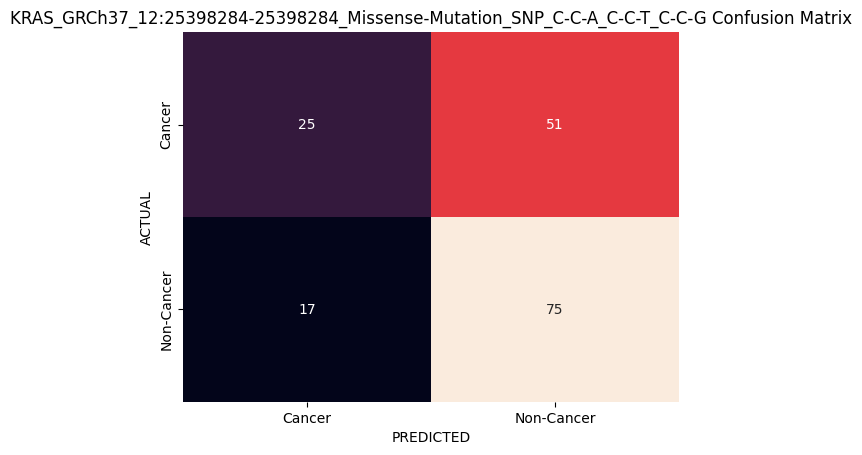

In [15]:
## Confusion Matrix
beta_val = values.sort_values(by='TP-FP',ascending=False).head(1)
confusion_matrix = pd.DataFrame(columns=["PP","PN"])
confusion_matrix["PP"] = beta_val.TP[0], beta_val.FP[0]
confusion_matrix["PN"] = beta_val.FN[0], beta_val.TN[0]

plt.title(f"{beta} Confusion Matrix")
sns.heatmap(confusion_matrix, annot=True, cbar=False, xticklabels=['Cancer','Non-Cancer'] ,yticklabels=['Cancer','Non-Cancer'], fmt='g')
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL")

## Top 10 Features from group A and group B

In [16]:
top10features

,Group A,Group B
0,BRAF_GRCh37_7:140453136-140453136_Missense-Mut...,KRAS_GRCh37_12:25398284-25398284_Missense-Muta...
1,DRD5_GRCh37_4:9785349-9785349_3'UTR_SNP_G-G-C,KRAS_GRCh37_12:25398281-25398281_Missense-Muta...
2,DRD5_GRCh37_4:9785421-9785421_3'UTR_SNP_G-G-T,APC_GRCh37_5:112175951-112175952_Frame-Shift-I...
3,ZBTB20_GRCh37_3:114058003-114058003_Frame-Shif...,APC_GRCh37_5:112116592-112116592_Nonsense-Muta...
4,DOCK3_GRCh37_3:51417604-51417604_Frame-Shift-D...,APC_GRCh37_5:112175639-112175639_Nonsense-Muta...
5,XYLT2_GRCh37_17:48433967-48433967_Frame-Shift-...,QKI_GRCh37_6:163987695-163987695_Intron_DEL_T-T--
6,PGM5_GRCh37_9:70993145-70993145_Missense-Mutat...,PIK3CA_GRCh37_3:178936082-178936082_Missense-M...
7,SVIL_GRCh37_10:29760116-29760116_Frame-Shift-D...,HCRTR2_GRCh37_6:55145214-55145214_Silent_SNP_G...
8,MICAL3_GRCh37_22:18300932-18300932_Frame-Shift...,DIS3_GRCh37_13:73337650-73337650_Missense-Muta...
9,RNF43_GRCh37_17:56435161-56435161_Frame-Shift-...,UBE2D1_GRCh37_10:60128572-60128572_3'UTR_DEL_T...


## Classification Rules | Assessing The Model | Decision Tree

In [17]:
def classify_fixed(sample):
    if sample[F.index[0]] == 1:
        return "positive" if sample[alpha] == 1 else "negative"
    else:
        return "positive" if sample[beta] == 1 else "negative"
    
data['classification'] = data.apply(classify_fixed, axis=1)

print(f"C1:{data[data['Unnamed: 0'] == "C1"].classification}")
print(f"C10:{data[data['Unnamed: 0'] == "C10"].classification}")
print(f"C30:{data[data['Unnamed: 0'] == "C30"].classification}")
print(f"NC5:{data[data['Unnamed: 0'] == "NC5"].classification}")
print(f"NC15:{data[data['Unnamed: 0'] == "NC15"].classification}")

C1:5    positive
Name: classification, dtype: object
C10:21    negative
Name: classification, dtype: object
C30:60    negative
Name: classification, dtype: object
NC5:12    positive
Name: classification, dtype: object
NC15:29    negative
Name: classification, dtype: object


In [18]:
y_true = data['Unnamed: 0'].str.startswith('C').astype(int)
y_pred = data['classification'].str.startswith('C').astype(int)
accuracy = (y_true == y_pred).mean()
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 48.26%


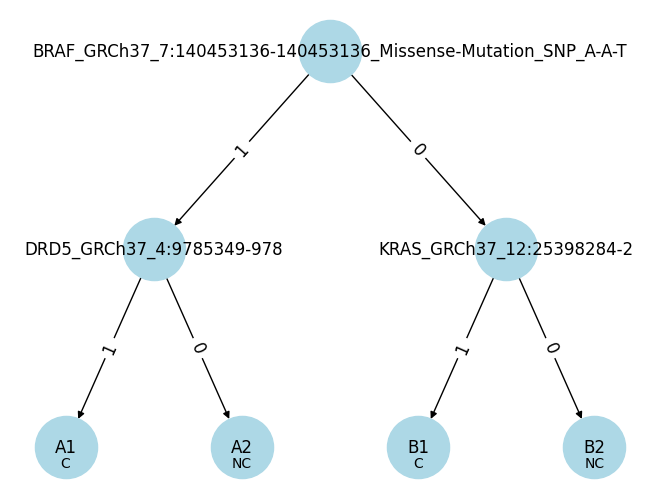

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

alpha = alpha[:25]
beta = beta[:25]

G = nx.DiGraph()

G.add_node(f"{F.index[0]}")
G.add_node(f"{alpha}")
G.add_node(f"{beta}")

G.add_node("A1")
G.add_node("A2")
G.add_node("B1")
G.add_node("B2")

G.add_edge(f"{F.index[0]}", f"{alpha}", label="1")  # F=1
G.add_edge(f"{F.index[0]}", f"{beta}", label="0")  # F=0
G.add_edge(f"{alpha}", "A1", label="1") # A=1
G.add_edge(f"{alpha}", "A2", label="0") # A=0
G.add_edge(f"{beta}", "B1", label="1") # B=1
G.add_edge(f"{beta}", "B2", label="0") # B=0

pos = {
    f"{F.index[0]}": (0, 2),
    f"{alpha}": (-1, 1),
    f"{beta}": (1, 1),
    "A1": (-1.5, 0),
    "A2": (-0.5, 0),
    "B1": (0.5, 0),
    "B2": (1.5, 0)
}

nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=12)

edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

class_labels = {
    "A1": "C",
    "A2": "NC",
    "B1": "C",
    "B2": "NC"
}
for node, cls in class_labels.items():
    x, y = pos[node]
    plt.text(x, y-0.1, cls, fontsize=10, ha='center', color='black')